In [ ]:
from numpy import sqrt, rint, zeros, random, zeros, ones

In [ ]:
N=10

In [ ]:
rx=zeros(N)

In [ ]:
rx=random.normal(0.5, 2, N)

In [ ]:
rx=ones(N)

In [ ]:
r2max=1.

In [ ]:
rx

In [ ]:
for k in range(N-1) :
    j=k+1
    #for j in range(k+1,N) :
    dx = rx[k]-rx[j:N]
    print(dx)
    input("Press Enter to continue...")
    dx[...]-= rint(dx)
    print(dx)
    input("Press Enter to continue...")
    r2 = dx*dx
    # using the mask array "b" for speedup
    b = r2 < r2max
    print(b)
    input("Press Enter to continue...")
    lm  = sqrt(r2[b])
    print('lm=', lm)
    #if lm<self.kg :
    for elm in lm :
        print(elm)

In [ ]:
N

In [ ]:
npmax=5
from numpy import cos, sin, pi

In [ ]:
cp = zeros((2*npmax+1,N))
cp[npmax,] = 1.0
sp = zeros((2*npmax+1,N))


In [ ]:
cp

In [ ]:
sp

In [ ]:
cp[npmax+1,] = cos(2*pi*rx)
sp[npmax+1,] = sin(2*pi*rx)

In [ ]:
cp

In [ ]:
sp

In [ ]:
for n in range(npmax):
    m = npmax+1+n
    print(n, m)
    cp[m,] = cp[npmax+1,]*cp[m-1,]-sp[npmax+1,]*sp[m-1,]
    sp[m,] = sp[npmax+1,]*cp[m-1,]+cp[npmax+1,]*sp[m-1,]

In [ ]:
cp

In [ ]:
sp

In [ ]:
for n in range(1,npmax+1):
    mm = npmax-n
    mp = npmax+n
    print(mp,mm)
    cp[mm,] = cp[mp,]
    sp[mm,] = -sp[mp,]

In [ ]:
cp

In [ ]:
sp

125 0
125 1
125 2
125 3
125 4
125 5
125 6
125 7
125 8
125 9
125 10
125 11
125 12
125 13
125 14
125 15
125 16
125 17
125 18
125 19
125 20
125 21
125 22
125 23
125 24
125 25
125 26
125 27
125 28
125 29
125 30
125 31
125 32
125 33
125 34
125 35
125 36
125 37
125 38
125 39
125 40
125 41
125 42
125 43
125 44
125 45
125 46
125 47
125 48
125 49
125 50
125 51
125 52
125 53
125 54
125 55
125 56
125 57
125 58
125 59
125 60
125 61
125 62
125 63
125 64
125 65
125 66
125 67
125 68
125 69
125 70
125 71
125 72
125 73
125 74
125 75
125 76
125 77
125 78
125 79
125 80
125 81
125 82
125 83
125 84
125 85
125 86
125 87
125 88
125 89
125 90
125 91
125 92
125 93
125 94
125 95
125 96
125 97
125 98
125 99
125 100
125 101
125 102
125 103
125 104
125 105
125 106
125 107
125 108
125 109
125 110
125 111
125 112
125 113
125 114
125 115
125 116
125 117
125 118
125 119
125 120
125 121
125 122
125 123
125 124


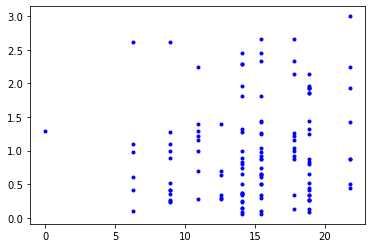

In [9]:
from numba import jit
import numpy as np
import math
# import  zeros, rint, cos, sin, ones, pi


# @jit(nopython=True, cache=True)
# @jit
def calcsofk(rx, ry, rz, nmax):

    N = rx.size

    cp = np.zeros((3, 2 * nmax + 1, N))
    sp = np.zeros((3, 2 * nmax + 1, N))
    cp[:, nmax, :] = 1.0     # this is the k=0 vector
    # these are the contribution of the first k-vector (1,0,0) and symmetries.
    cp[0, nmax+1, :] = np.cos(2 * np.pi * rx[:])
    cp[1, nmax+1, :] = np.cos(2 * np.pi * ry[:])
    cp[2, nmax+1, :] = np.cos(2 * np.pi * rz[:])
    sp[0, nmax+1, :] = np.sin(2 * np.pi * rx[:])
    sp[1, nmax+1, :] = np.sin(2 * np.pi * ry[:])
    sp[2, nmax+1, :] = np.sin(2 * np.pi * rz[:])
    #
    # for n in range(nmax-1):
    for n in range(nmax):
        m = nmax + 1 + n
        cp[:, m, :] = (cp[:, nmax+1, :] * cp[:, m-1, :] -
                       sp[:, nmax+1, :] * sp[:, m-1, :])
        sp[:, m, :] = (sp[:, nmax+1, :] * cp[:, m-1, :] +
                       cp[:, nmax+1, :] * sp[:, m-1, :])
    for n in range(1, nmax+1):
        mm = nmax-n
        mp = nmax+n
        # print(mp,mm)
        # impose the symmetry of cos and sin along the axes
        cp[:, mm, :] = cp[:, mp, :]
        sp[:, mm, :] = - sp[:, mp, :]

    # these are the sum of cos and sin over particles.
    # indices are along the three directions (nx, ny, nz)
    csum = np.zeros((2*nmax+1, 2*nmax+1, 2*nmax+1), dtype=float)
    ssum = np.zeros((2*nmax+1, 2*nmax+1, 2*nmax+1), dtype=float)

    for k in range(N):
        for nx in range(2 * nmax + 1):
            for ny in range(2 * nmax + 1):
                for nz in range(2 * nmax + 1):
                    csum[nx, ny, nz] += (cp[0, nx, k] * cp[1, ny, k] * cp[2, nz, k] -
                                         cp[0, nx, k] * sp[1, ny, k] * sp[2, nz, k] -
                                         sp[0, nx, k] * sp[1, ny, k] * cp[2, nz, k] +
                                         sp[0, nx, k] * cp[1, ny, k] * sp[2, nz, k])
                    ssum[nx, ny, nz] += (sp[0, nx, k] * cp[1, ny, k] * cp[2, nz, k] -
                                         sp[0, nx, k] * sp[1, ny, k] * sp[2, nz, k] +
                                         cp[0, nx, k] * sp[1, ny, k] * cp[2, nz, k] +
                                         cp[0, nx, k] * cp[1, ny, k] * sp[2, nz, k])
 
    sofk = np.zeros((2*nmax+1, 2*nmax+1, 2*nmax+1), dtype=float)
    sofk = (csum**2 + ssum**2) / N
    return sofk
    #return (csum**2 + ssum**2) / N

if __name__ == '__main__':

    from matplotlib.pyplot import plot, show
    rx = np.asarray([1., 0.4, 0.2])
    ry = np.asarray([0.35, 0.2, 0.1])
    rz = np.asarray([0.66, 0.27, 1.2])
    nmax=2
    
    sofk=calcsofk(rx,ry,rz,nmax)
    nvec = (2*nmax+1)**3
    kmod = np.zeros(nvec)
    kvec = np.zeros((3,nvec))
    sofk_kvec = np.zeros(nvec)
    ix=-1
    for nx in range(2 * nmax + 1):
        for ny in range(2 * nmax + 1):
            for nz in range(2 * nmax + 1):
                ix += 1
                print(nvec,ix)
                kmod[ix] = 2*np.pi * np.sqrt((nx-nmax)**2+(ny-nmax)**2+(nz-nmax)**2)
                kvec[0,ix] = 2 * np.pi * nx-nmax
                kvec[1,ix] = 2 * np.pi * ny-nmax
                kvec[2,ix] = 2 * np.pi * nz-nmax
                sofk_kvec[ix] = sofk[nx-nmax,ny-nmax,nz-nmax]
                 
    plot(kmod,sofk_kvec,'b.')
    show()
    
#    print('Sk:', calcsofk(rx, ry, rz, 4))

In [4]:
sofk.shape

(11, 11, 11)